In [1]:
# Loading the Reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/anaconda3/lib/python3.7/site-packages/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
# Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])      

In [6]:
train_labels[10]

3

In [7]:
#  Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Vectorized training data
x_train = vectorize_sequences(train_data) 

# Vectorized test data
x_test = vectorize_sequences(test_data) 

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
# Vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)     
#  Vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)          

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
# Model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 112us/step - loss: 2.5126 - accuracy: 0.4617 - val_loss: 1.6758 - val_accuracy: 0.6310
Epoch 2/20
7982/7982 [==============================] - 1s 75us/step - loss: 1.3823 - accuracy: 0.7026 - val_loss: 1.3016 - val_accuracy: 0.7130
Epoch 3/20
7982/7982 [==============================] - 1s 75us/step - loss: 1.0353 - accuracy: 0.7750 - val_loss: 1.1280 - val_accuracy: 0.7540
Epoch 4/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.8216 - accuracy: 0.8207 - val_loss: 1.0280 - val_accuracy: 0.7870
Epoch 5/20
7982/7982 [==============================] - 2s 244us/step - loss: 0.6633 - accuracy: 0.8584 - val_loss: 0.9768 - val_accuracy: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.5329 - accuracy: 0.8894 - val_loss: 0.9493 - val_accuracy: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 125us/step - loss: 0

In [14]:
history_dict = history.history

In [15]:
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

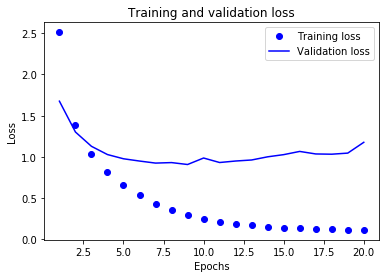

In [16]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


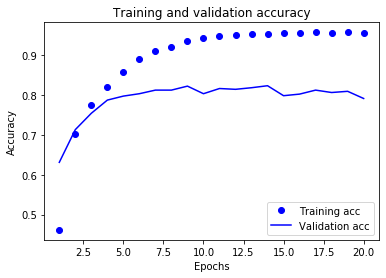

In [17]:
# Plotting the training and validation accuracy

# Clears the figure
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 89us/step - loss: 2.4536 - accuracy: 0.5144 - val_loss: 1.6992 - val_accuracy: 0.6230
Epoch 2/9
7982/7982 [==============================] - 1s 75us/step - loss: 1.3873 - accuracy: 0.7060 - val_loss: 1.2945 - val_accuracy: 0.7100
Epoch 3/9
7982/7982 [==============================] - 1s 77us/step - loss: 1.0312 - accuracy: 0.7809 - val_loss: 1.1263 - val_accuracy: 0.7660
Epoch 4/9
7982/7982 [==============================] - 1s 82us/step - loss: 0.8056 - accuracy: 0.8307 - val_loss: 1.0420 - val_accuracy: 0.7800
Epoch 5/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.6339 - accuracy: 0.8661 - val_loss: 0.9767 - val_accuracy: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 76us/step - loss: 0.5056 - accuracy: 0.8939 - val_loss: 0.9169 - val_accuracy: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 80us/step - loss: 0.4031 - acc

In [19]:
results


[0.9930637808432031, 0.7911843061447144]

In [20]:
# Generating predictions for new data

predictions = model.predict(x_test)


In [21]:
predictions[0].shape

(46,)

In [22]:
np.sum(predictions[0])

1.0000001

In [23]:
np.argmax(predictions[0])

3